In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os.path as osp
from PIL import Image

import torchvision.datasets as dset
import torchvision.transforms as T
import chest_xray_code.data.xrays as preprocess_dataset
import chest_xray_code.data.raw_reports as utils
import os
import torch.nn.functional as F
from models.ConvModel import OriginalConvNet
from models.NewConvModel import NewConvNet
from loaders.BloodCellLoader import BloodCellLoader


import numpy as np

In [2]:
trainset = BloodCellLoader(
    root='blood_cells_data/dataset-master/JPEGImages',
    preload=False, transform=transforms.ToTensor(),
)
# Use the torch dataloader to iterate through the dataset
trainset_loader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=24)

# load the testset
# testset = Data_SET(
#     root='chest_xray_code/data/xrays',
#     preload=True, transform=transforms.ToTensor(),
# )
#testset = trainset
# Use the torch dataloader to iterate through the dataset
#testset_loader = DataLoader(testset, batch_size=1000, shuffle=False, num_workers=1)

print(len(trainset))

366


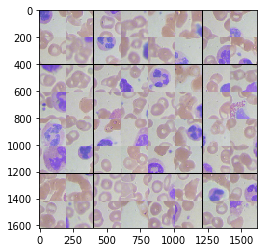

In [3]:
def imshow_noax(img, normalize=True):
    #Tiny helper to show images as uint8 and remove axis labels
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img)
    plt.gca().axis('off')
    
    # functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainset_loader)
images = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))



In [4]:
NUM_TRAIN = 100

transform = T.Compose([
                T.ToTensor()
                #T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

loader_train = trainset
images = {}

In [5]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    #dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 5

print('using device:', device)

using device: cuda


# Architecture and Training

In [6]:
def train(model, epoch, log_interval=100):
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    model = torch.nn.DataParallel(model)
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        for batch_idx, (data) in enumerate(trainset_loader):
            data = data.to(device=device, dtype=dtype)
            optimizer.zero_grad()
            reconstruction = model(data)
            loss_function = nn.MSELoss(size_average=True)
            loss = loss_function(reconstruction, data)
            loss.backward()
            optimizer.step()
        if ep % print_every == 0:
            print('Iteration %d, loss = %.4f' % (ep, loss.item()))
            print()

def test():
    model.eval()  # set evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data in testset_loader:
            data = data.to(device)
            output = model(data)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testset_loader.dataset),
        100. * correct / len(testset_loader.dataset)))

def save_compressed(self,input,output):
    #for i in range(1):
    img = output.cpu().detach()
    for i in range(img.shape[0]):

        individual_img = img[i]
        axarr[i,1].axis('off')
        axarr[i,1].imshow(prep(individual_img))
        images[1].append(prep(individual_img))
    

In [7]:
channels = 3
size = 32
model = NewConvNet(channels,size,device)
#hook = model.conv_compress_final.register_forward_hook(save_compressed)
#hook.remove()

optimizer = optim.Adam(model.parameters(), lr=5e-3) 
train(model,1700)
torch.save(model, 'new_blood_cell.pt')

Iteration 0, loss = 0.0673



Process Process-90:
Process Process-94:
Process Process-91:
Process Process-95:
Process Process-75:
Process Process-96:
Process Process-80:
Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process Process-93:
Process Process-86:
Traceback (most recent call last):
Process Process-78:
Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataload

  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/s

  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get

Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-91dccbd9cf95>", line 8, in <module>
    train(model,20)
  File "<ipython-input-6-85f3e19bbd55>", line 10, in train
    reconstruction = model(data)
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/nn/modules/module.py", line 491, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 114, in forward
    outputs = self.parallel_apply(replicas, inputs, kwargs)
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 124, in parallel_apply
    return parallel_apply(replicas, inputs, kwargs, self.device_ids[:len(replicas)])
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/nn/parallel/para

KeyboardInterrupt: 

In [ ]:


#model = torch.load('trained_models/xraymodelV2.pt')

plt.close("all")


images = [[],[]]

def prep(img):
    img = img.numpy()
    if True:
        img_max, img_min = np.max(img), np.min(img)
        img = .9* (img - img_min) / (img_max - img_min) 
    return np.transpose(img, (1, 2, 0)) 
    
def save_compressed(self,input,output):
    #for i in range(1):
    img = output.cpu().detach()
    for i in range(img.shape[0]):
        individual_img = img[i]
        images[1].append(prep(individual_img))
    
    

def save_original(data):
    img = data.cpu().detach()
    
    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        images[0].append(individual_img)

hook = model.conv_compress_final.register_forward_hook(save_compressed)
#hook.remove()
        
        
i = 0
reconstruction = None
for data in trainset_loader:
    with torch.no_grad():
        if i > 0: break
        data = data.to(device)
        save_original(data)
        reconstruction = model(data)
        i+=1

for i in range(20):
    plt.figure(figsize=(200,200))
    org = images[0][i]
    plt.subplot(1, 3, 1)
    plt.axis('off')
    #imshow_noax(org, normalize=False)
    plt.imshow(org)
    plt.title('Original')
    plt.subplot(1, 3, 2)
    rec = images[1][i]
    plt.imshow(rec)
    #imshow_noax(rec, normalize=False)
    plt.title('Compressed')
    plt.axis('off')
    image_str = str(i) + ".png"
    plt.subplot(1, 3, 3)
    plt.axis('off')
    recon = reconstruction[i].cpu().detach()
    recon = recon.numpy()
    recon = np.transpose(recon,(1,2,0))
    recon = np.clip(recon,0,1)
    plt.imshow(recon)
    plt.title('Reconstructed')
    plt.savefig("xray_outputs/"+image_str)
    plt.show()
